<a href="https://colab.research.google.com/github/DataScientist64/DataAnalysis/blob/main/creditcardfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_csv("/content/credit_card_fraud_10k.csv")

In [3]:
df.head(5)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [4]:
df.isna().sum()

,0
transaction_id,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [5]:
df.dtypes

,0
transaction_id,int64
amount,float64
transaction_hour,int64
merchant_category,object
foreign_transaction,int64
location_mismatch,int64
device_trust_score,int64
velocity_last_24h,int64
cardholder_age,int64
is_fraud,int64


In [6]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,9849
1,151


In [9]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [19]:
num_features = X_train.select_dtypes(include='number').columns.to_list()
cat_features = X_train.select_dtypes(include=['object','category']).columns.to_list()

In [23]:
num_transformers = Pipeline(steps=[('scaler',StandardScaler())])
cat_transformers = Pipeline(steps=[('one hot',OneHotEncoder())])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformers, num_features),
        ('cat', cat_transformers, cat_features)
    ]
)

In [28]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['transaction_id', 'amount',
                                  'transaction_hour', 'foreign_transaction',
                                  'location_mismatch', 'device_trust_score',
                                  'velocity_last_24h', 'cardholder_age']),
                                ('cat',
                                 Pipeline(steps=[('one hot', OneHotEncoder())]),
                                 ['merchant_category'])])

In [31]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Classifier', RandomForestClassifier(random_state=42))
])

In [32]:
param_grid = {
    'Classifier__n_estimators':[50,100,200,300],
    'Classifier__max_depth':[None,10,20,30,40,50],
    'Classifier__min_samples_split':[2,5]
}

In [33]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [34]:
grid_search = GridSearchCV(pipeline,param_grid,cv=cv,scoring='accuracy',verbose=2)

In [35]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   1.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.8s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.7s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.5s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.4s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   1.0s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   1.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['transaction_id',
                                                                          'amount',
                                                                          'transaction_hour',
                                                                          'foreign_transaction',
                                                                          'location_mismatch',
                                                                          'device_trust_score',
                                                                          'velocity_last_24h',
                                                                          'cardholder_age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder())]),
                                                                         ['merchant_category'])])),
                                       ('Classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'Classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'Classifier__min_samples_split': [2, 5],
                         'Classifier__n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'Classifier__max_depth': None, 'Classifier__min_samples_split': 5, 'Classifier__n_estimators': 50}
0.9926250000000001


In [39]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      0.77      0.87        30

    accuracy                           1.00      2000
   macro avg       1.00      0.88      0.93      2000
weighted avg       1.00      1.00      1.00      2000



In [40]:
conf_matrix = confusion_matrix(y_test,y_pred)

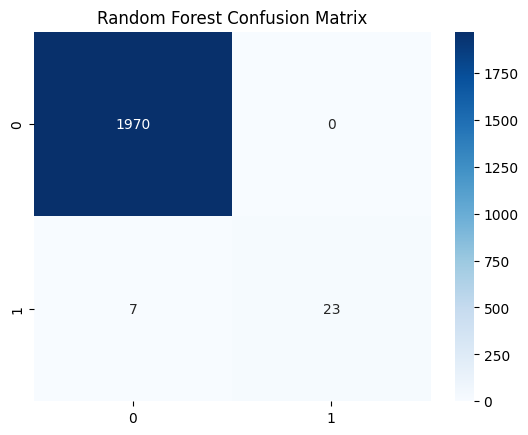

In [42]:
plt.figure()
sns.heatmap(conf_matrix,cmap="Blues",annot=True, fmt='g')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [44]:
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Classifier', DecisionTreeClassifier(random_state=42))
])

In [45]:
param_grid_tree = {
    "Classifier__criterion": ["gini", "entropy", "log_loss"],
    "Classifier__splitter": ["best", "random"],
    "Classifier__max_depth": [None, 5, 10, 20],
    "Classifier__min_samples_split": [2, 5, 10],
    "Classifier__min_samples_leaf": [1, 2, 5],
    "Classifier__max_features": [None, "sqrt", "log2"],
    "Classifier__class_weight": [None, "balanced"]
}

In [46]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [47]:
grid_search_tree = GridSearchCV(pipeline_tree,param_grid_tree,cv=cv,scoring='accuracy',verbose=2)

In [48]:
grid_search_tree.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.0s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.1s
[CV] END Classifier__class_weight=None, Classifier__criterion=entropy, Classifier__max_depth=5, Classifier__max_features=sqrt, Classifier__min_samples_leaf=2, Classifier__min_samples_split=5, Classifier__splitter=best; total time=   0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['transaction_id',
                                                                          'amount',
                                                                          'transaction_hour',
                                                                          'foreign_transaction',
                                                                          'location_mismatch',
                                                                          'device_trust_score',
                                                                          'velocity_last_24h',
                                                                          'cardholder_age']),...
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'Classifier__max_depth': [None, 5, 10, 20],
                         'Classifier__max_features': [None, 'sqrt', 'log2'],
                         'Classifier__min_samples_leaf': [1, 2, 5],
                         'Classifier__min_samples_split': [2, 5, 10],
                         'Classifier__splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [50]:
y_pred_tree = grid_search_tree.predict(X_test)
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      1.00      1.00        30

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [51]:
conf_matrix_tree = confusion_matrix(y_test,y_pred_tree)

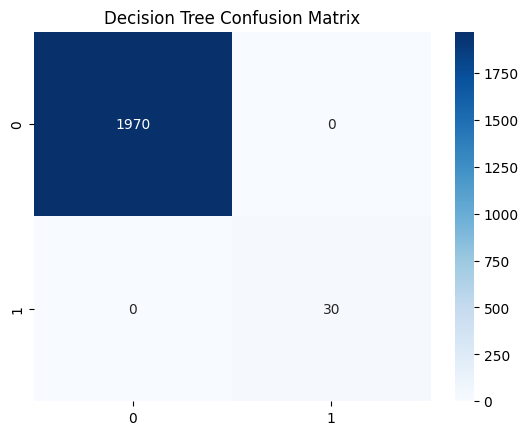

In [52]:
plt.figure()
sns.heatmap(conf_matrix_tree,cmap="Blues",annot=True, fmt='g')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_test, y_pred)
print(f"Random Forest ROC AUC: {roc_auc_rf}")

roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print(f"Decision Tree ROC AUC: {roc_auc_tree}")

Random Forest ROC AUC: 0.8833333333333333
Decision Tree ROC AUC: 1.0


In [60]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Classifier', LogisticRegression(random_state=42))
])

In [61]:
param_grid_lr={
    'Classifier__penalty':['l1','l2'],
    'Classifier__C':[0.01, 0.1, 1, 10, 100],
    'Classifier__solver': ['liblinear', 'saga'],
    'Classifier__class_weight':[None,'balanced'],
    'Classifier__max_iter': [200, 500, 1000]

}

In [62]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [63]:
grid_search_lr = GridSearchCV(pipeline_lr,param_grid_lr,cv=cv,scoring='accuracy',verbose=2)

In [64]:
grid_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total t

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.3s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   3.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.01, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.2s
[CV] END Classifier__C=0.1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weigh

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.6s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.8s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=0.1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   3.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Class

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=None, Classifier__

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.5s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=1, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.8s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.3s
[CV] END Classifier__C=10, Classifier__class_weight=None, 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s
[CV] END Classifier__C=10, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.9s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weigh

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.9s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.1s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.8s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.9s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s
[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.6s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=10, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.7s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.3s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.2s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.2s
[CV] END Classifier__C=100, Classifier__class_weight=

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.7s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.4s
[CV] END Classifier__C=100, Classifier__class_weight=None

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.0s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.9s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.2s
[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   2.1s
[CV] END Classifier__C=100, Classifier__class_weight

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   3.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=None, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.9s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.4s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   7.3s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.4s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l1, Classifier__solver=saga; total time=   0.5s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=200, Classifier__penalty=l2, Classifier__solver=saga; total time=   0.4s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   7.1s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.2s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   7.3s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.3s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   7.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l1, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=500, Classifier__penalty=l2, Classifier__solver=saga; total time=   1.2s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.5s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.8s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.5s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   7.1s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   6.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   3.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l1, Classifier__solver=saga; total time=   2.4s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=liblinear; total time=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   3.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END Classifier__C=100, Classifier__class_weight=balanced, Classifier__max_iter=1000, Classifier__penalty=l2, Classifier__solver=saga; total time=   2.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['transaction_id',
                                                                          'amount',
                                                                          'transaction_hour',
                                                                          'foreign_transaction',
                                                                          'location_mismatch',
                                                                          'device_trust_score',
                                                                          'velocity_last_24h',
                                                                          'cardholder_age']),...
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder())]),
                                                                         ['merchant_category'])])),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.01, 0.1, 1, 10, 100],
                         'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__max_iter': [200, 500, 1000],
                         'Classifier__penalty': ['l1', 'l2'],
                         'Classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [65]:
y_pred_lr = grid_search_lr.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1970
           1       0.75      0.60      0.67        30

    accuracy                           0.99      2000
   macro avg       0.87      0.80      0.83      2000
weighted avg       0.99      0.99      0.99      2000



In [68]:
conf_matrix_lr= confusion_matrix(y_test,y_pred_lr)

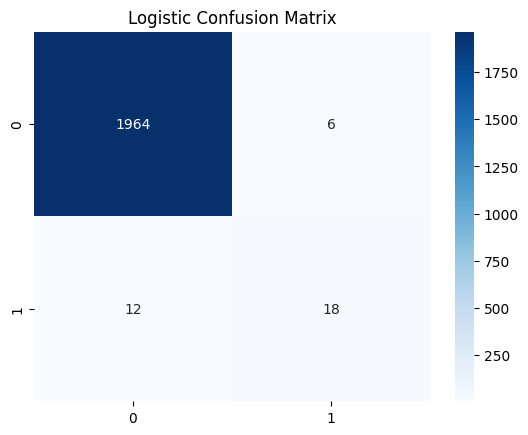

In [69]:
plt.figure()
sns.heatmap(conf_matrix_lr,cmap="Blues",annot=True, fmt='g')
plt.title("Logistic Confusion Matrix")
plt.show()

In [72]:
roc_auc_lr = roc_auc_score(y_test,y_pred_lr)
print(roc_auc_lr)

0.7984771573604061


In [74]:
from xgboost import XGBClassifier

In [78]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Classifier', XGBClassifier(random_state=42))
])

In [86]:
param_grid_xgb = {
    'Classifier__n_estimators': [100, 200],
    'Classifier__max_depth': [3, 4, 5],
    'Classifier__learning_rate': [0.01, 0.05, 0.1],
    'Classifier__subsample': [0.7, 0.8],
    'Classifier__colsample_bytree': [0.7, 0.8],
    'Classifier__scale_pos_weight': [X_train.shape[0] / y_train.value_counts()[1]] # Dynamically calculate for imbalance
}

In [87]:
cv = StratifiedKFold(n_splits=5,shuffle=True)

In [88]:
grid_search_xgb = GridSearchCV(pipeline_xgb,param_grid_xgb,cv=cv,scoring='accuracy',verbose=2)

In [89]:
grid_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END Classifier__colsample_bytree=0.7, Classifier__learning_rate=0.01, Classifier__max_depth=3, Classifier__n_estimators=100, Classifier__scale_pos_weight=66.11570247933884, Classifier__subsample=0.7; total time=   0.1s
[CV] END Classifier__colsample_bytree=0.7, Classifier__learning_rate=0.01, Classifier__max_depth=3, Classifier__n_estimators=100, Classifier__scale_pos_weight=66.11570247933884, Classifier__subsample=0.7; total time=   0.1s
[CV] END Classifier__colsample_bytree=0.7, Classifier__learning_rate=0.01, Classifier__max_depth=3, Classifier__n_estimators=100, Classifier__scale_pos_weight=66.11570247933884, Classifier__subsample=0.7; total time=   0.1s
[CV] END Classifier__colsample_bytree=0.7, Classifier__learning_rate=0.01, Classifier__max_depth=3, Classifier__n_estimators=100, Classifier__scale_pos_weight=66.11570247933884, Classifier__subsample=0.7; total time=   0.1s
[CV] END Classifier__colsample_bytree=0.7,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['transaction_id',
                                                                          'amount',
                                                                          'transaction_hour',
                                                                          'foreign_transaction',
                                                                          'location_mismatch',
                                                                          'device_trust_score',
                                                                          'velocity_last_24h',
                                                                          'cardholder_age']),...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             param_grid={'Classifier__colsample_bytree': [0.7, 0.8],
                         'Classifier__learning_rate': [0.01, 0.05, 0.1],
                         'Classifier__max_depth': [3, 4, 5],
                         'Classifier__n_estimators': [100, 200],
                         'Classifier__scale_pos_weight': [np.float64(66.11570247933884)],
                         'Classifier__subsample': [0.7, 0.8]},
             scoring='accuracy', verbose=2)

In [90]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [91]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       1.00      1.00      1.00        30

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [92]:
conf_matrix_xgb= confusion_matrix(y_test,y_pred_xgb)

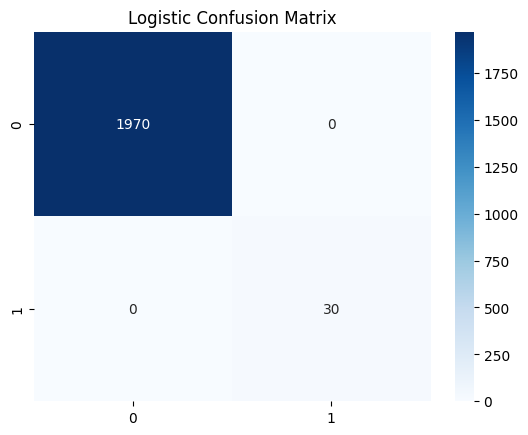

In [93]:
plt.figure()
sns.heatmap(conf_matrix_xgb,cmap="Blues",annot=True, fmt='g')
plt.title("Logistic Confusion Matrix")
plt.show()

In [94]:
roc_auc_xgb = roc_auc_score(y_test,y_pred_xgb)
print(roc_auc_xgb)

1.0
